In [1]:
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, GRU, RNN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data into a dataframe
data = np.load('polution_dataSet.npy')

In [3]:
'''
IN this part data for test, validation and train is preperd.
'''
# data format is : pollution  ,dew  ,temp  , press ,wnd_dir , wnd_spd , snow , rain
# total data =43000
# per day and week = 43000/24*7 =250

SAMPLE_DISTANCE = 1      # if 1 sample per hour, if 24 per day, if 24*7 per week
TRAIN_SIZE = 7000
VAL_SIZE = 1000
TEST_SIZE = 2000
TIMESTEPS = 24           # timesteps used for a single prediction (here each timestep is an hour)

In [4]:
x_train = []
y_train = []
for i in range(TRAIN_SIZE):
    x_train.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_train.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_train = np.array(x_train)
y_train = np.array(y_train)

In [5]:
x_val = []
y_val = []
for i in range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE):
    x_val.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_val.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_val = np.array(x_val)
y_val = np.array(y_val)

In [6]:
x_test = []
y_test = []
for i in range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE):
    x_test.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_test.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_test = np.array(x_test)
y_test = np.array(y_test)
y_total = np.concatenate([y_train, y_val, y_test], axis=None)

In [7]:
'''
In this part network is implemented 
'''
# parameters
BATCH_SIZE = 10
NUM_EPOCHS = 20
HIDDEN_SIZE = 40

In [8]:
K.clear_session()
# keras modeling
model = Sequential()
model.add(LSTM(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.summary()

history1 = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

y_train1 = model.predict(x_train, batch_size=BATCH_SIZE)
y_val1 = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred1 = model.predict(x_test, batch_size=BATCH_SIZE)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                7840      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 7,881
Trainable params: 7,881
Non-trainable params: 0
_________________________________________________________________
Train on 7000 samples, validate on 1000 samples
Epoch 1/20
7000/7000 [==============================] - 12s 2ms/step - loss: 0.0293 - val_loss: 0.0242
Epoch 2/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0183 - val_loss: 0.0209
Epoch 3/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0165 - val_loss: 0.0171
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0156 - val_loss: 0.0142
Epoch 5/20
7000/7000 [==============================] - 10s 1ms/step - loss:

In [9]:
K.clear_session()
# keras modeling
model = Sequential()
model.add(LSTM(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

history2 = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

y_train2 = model.predict(x_train, batch_size=BATCH_SIZE)
y_val2 = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred2 = model.predict(x_test, batch_size=BATCH_SIZE)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                7840      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 7,881
Trainable params: 7,881
Non-trainable params: 0
_________________________________________________________________
Train on 7000 samples, validate on 1000 samples
Epoch 1/20
7000/7000 [==============================] - 12s 2ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 2/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 3/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0011 - val_loss: 8.4194e-04
Epoch 4/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/20
7000/7000 [==============================] - 12s 2ms/step - l

In [30]:
K.clear_session()
# keras modeling
model = Sequential()
model.add(LSTM(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='msle', optimizer='adam')
model.summary()

history3 = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

y_train3 = model.predict(x_train, batch_size=BATCH_SIZE)
y_val3 = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred3 = model.predict(x_test, batch_size=BATCH_SIZE)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                7840      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 7,881
Trainable params: 7,881
Non-trainable params: 0
_________________________________________________________________
Train on 7000 samples, validate on 1000 samples
Epoch 1/20
7000/7000 [==============================] - 12s 2ms/step - loss: 0.0130 - val_loss: 0.0228
Epoch 2/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0130 - val_loss: 0.0228
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0130 - val_loss: 0.0228
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0130 - val_loss: 0.0228
Epoch 5/20
7000/7000 [==============================] - 11s 2ms/step - loss:

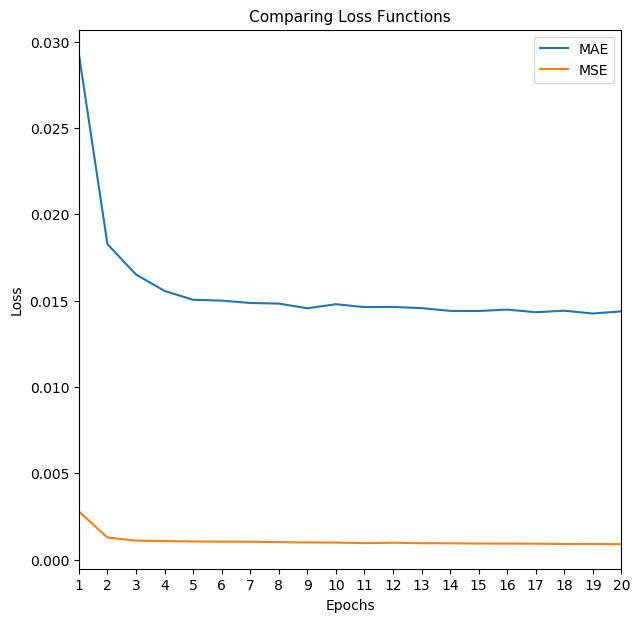

In [34]:
plt.figure(1, figsize=(7, 7), dpi=100)
plt.style.use(['default'])
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history1.history['loss'], label='MAE')
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history2.history['loss'], label='MSE')
plt.xticks(np.arange(1, NUM_EPOCHS+1, 1, dtype=int))
plt.xlim(1, NUM_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Loss Functions', fontsize=11)
plt.legend()
plt.show()